In [29]:
# Step 1: Load and Prepare the Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Make plots appear inside the notebook
%matplotlib inline

# 1. Load the Wine dataset from sklearn
wine = load_wine()

# wine.data   -> feature values (numeric matrix)
# wine.target -> class labels (0, 1, 2)
# wine.feature_names -> list of column names

X = wine.data           # features
y = wine.target         # target labels (wine classes)

# 2. Basic data exploration: convert to DataFrame just for nicer viewing
df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nFeature names:")
print(wine.feature_names)

print("\nTarget names (wine classes):")
print(wine.target_names)

# 3. Class distribution
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print("\nClass distribution (label: count):")
print(class_counts)

# 4. Train–test split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps class proportions similar in train and test
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Shape of dataset: (178, 14)

First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names (wine classes):
['class_0' 'class_1' 'class_2']

Class distribution (label: count):
{np.int64(0): np.int64(59), np.int64(1): np.int64(71), np.int64(2): np.int64(48)}

Training set size: 142
Test set size: 36


In [30]:
# Step 2: Implement K-Nearest Neighbors (KNN)

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    # Create the KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit (train) the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict class labels for the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy on the test set
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    
    print(f"k = {k:2d} -> Accuracy = {acc:.4f}")

knn_results = pd.DataFrame({
    "k": k_values,
    "accuracy": knn_accuracies
})
print("\nKNN results:")
display(knn_results)


k =  1 -> Accuracy = 0.7778
k =  5 -> Accuracy = 0.8056
k = 11 -> Accuracy = 0.8056
k = 15 -> Accuracy = 0.8056
k = 21 -> Accuracy = 0.8056

KNN results:


,k,accuracy
0,1,0.777778
1,5,0.805556
2,11,0.805556
3,15,0.805556
4,21,0.805556


In [31]:
# Step 3: Implement Radius Neighbors (RNN)

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    # Create the Radius Neighbors classifier
    # outlier_label='most_frequent' means:
    #   if a test point has no neighbors within the radius,
    #   it will be assigned the most frequent training class
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    
    # Train the model
    rnn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred_rnn = rnn.predict(X_test)
    
    # Compute accuracy
    acc_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_accuracies.append(acc_rnn)
    
    print(f"radius = {r:3d} -> Accuracy = {acc_rnn:.4f}")

rnn_results = pd.DataFrame({
    "radius": radius_values,
    "accuracy": rnn_accuracies
})
print("\nRNN results:")
display(rnn_results)


radius = 350 -> Accuracy = 0.7222
radius = 400 -> Accuracy = 0.6944
radius = 450 -> Accuracy = 0.6944
radius = 500 -> Accuracy = 0.6944
radius = 550 -> Accuracy = 0.6667
radius = 600 -> Accuracy = 0.6667

RNN results:


,radius,accuracy
0,350,0.722222
1,400,0.694444
2,450,0.694444
3,500,0.694444
4,550,0.666667
5,600,0.666667


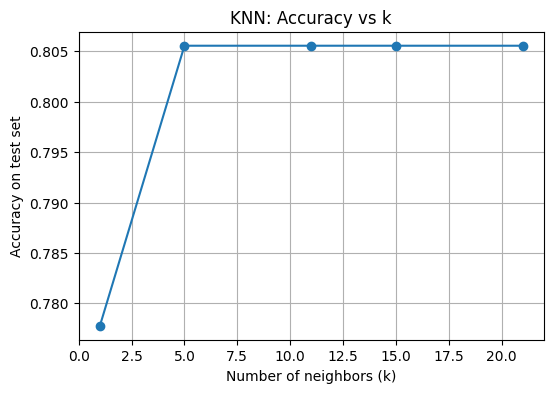

In [32]:
# Step 4.1: Plot accuracy trends for different k values (KNN)

plt.figure(figsize=(6, 4))
plt.plot(k_values, knn_accuracies, marker="o")
plt.title("KNN: Accuracy vs k")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy on test set")
plt.grid(True)
plt.show()


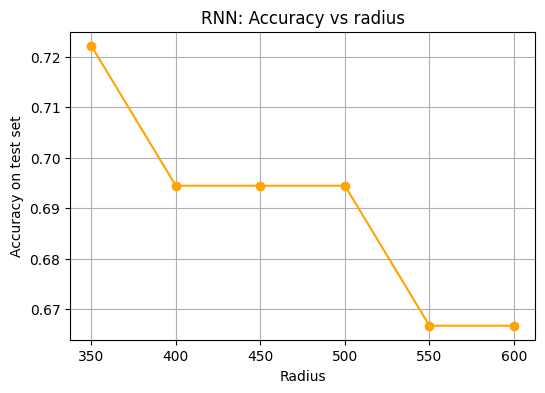

In [33]:
# Step 4.2: Plot accuracy trends for different radius values (RNN)

plt.figure(figsize=(6, 4))
plt.plot(radius_values, rnn_accuracies, marker="o", color="orange")
plt.title("RNN: Accuracy vs radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy on test set")
plt.grid(True)
plt.show()
